In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
books = pd.read_csv(r"C:\Users\Student\Downloads\books.csv")
ratings = pd.read_csv(r"C:\Users\Student\Downloads\ratings.csv")

In [21]:
#---Content_Based Filtering---
books['features'] = books['Title']+" "+books['Author']+" "+books['Genre']
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(books['features'])
content_similarity = cosine_similarity(tfidf_matrix)


In [22]:
book_index=0 #harry potter
similar_book=content_similarity[book_index].argsort()[::-1][1:4]
print("Content-Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_book]['Title'].tolist())

Content-Based Recommendations for 'Harry Potter':
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']


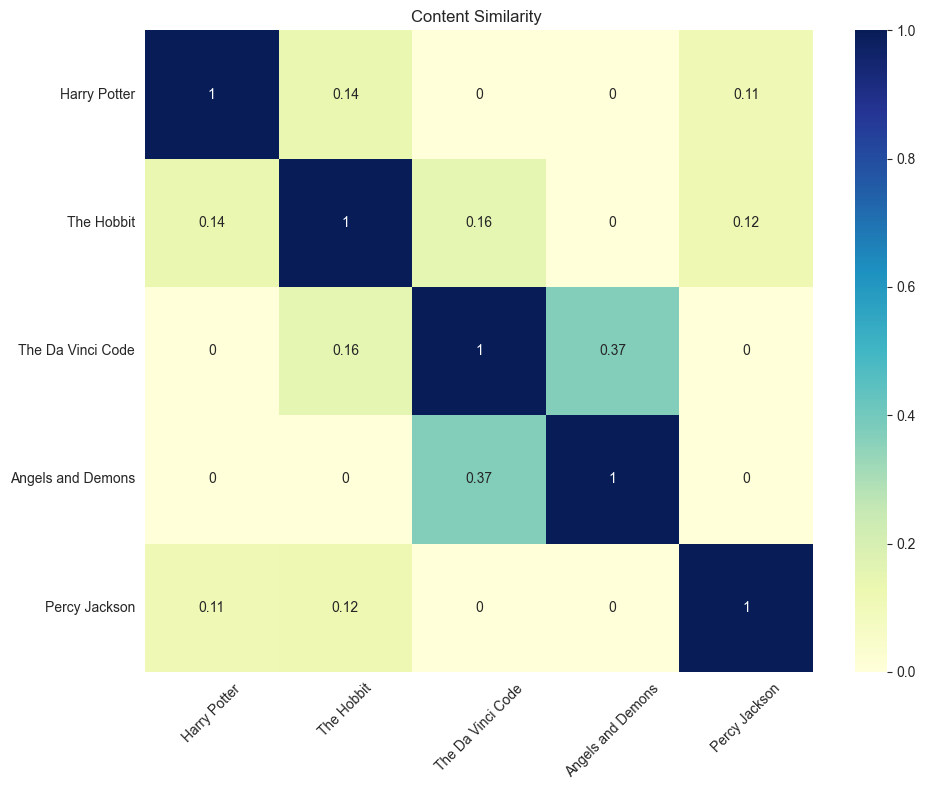

In [23]:
#visual
plt.figure(figsize=(10, 8))
sns.heatmap(content_similarity,
            xticklabels=books["Title"],
            yticklabels=books["Title"],
            annot=True,
            cmap="YlGnBu")
plt.title("Content Similarity ")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
User_item_matrix=ratings.pivot_table(index='User_ID',columns='Book_ID',values='Rating').fillna(0)
User_similarity=cosine_similarity(User_item_matrix)

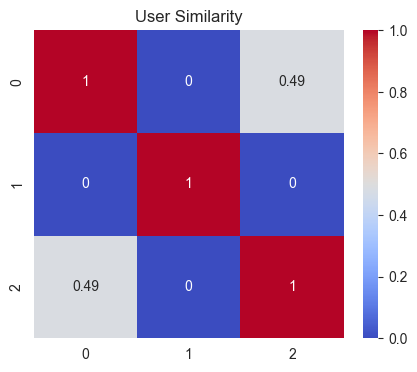

In [28]:
plt.figure(figsize=(5,4))
sns.heatmap(User_similarity,annot=True,cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [30]:
import numpy as np
user_sim_df = pd.DataFrame(User_similarity,index=User_item_matrix.index,columns=User_item_matrix.index)
similar_users=user_sim_df[1].sort_values(ascending=False)[1:]
print("\nUsers most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [33]:
content_scores=content_similarity[book_index]
user_ratings=User_item_matrix.loc[1]
aligned_ratings=user_ratings.reindex(books['Book_ID']).fillna(0).values
hybird_score=0.5* content_scores+0.4* aligned_ratings
top_indices=np.argsort(hybird_score)[::-1]
recommended_indices=[i for i in top_indices if i != book_index][:3]
print("\nHybird Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())


Hybird Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']
